In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv(r"C:\Users\srija\OneDrive\Desktop\Projects\INTERNSHIP PROJECTS\Cognifyz Technologies\Dataset .csv")

In [23]:
print(df.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [24]:
print(df['Rating text'])

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object


# TASK1 Restaurant Reviews

In [25]:
# Analyze the text reviews to identify the most common positive and negative keywords

In [26]:
positive_data = df.loc[df['Aggregate rating'] >= 2.5]
print(positive_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [27]:
positive_keywords = positive_data['Rating text'].unique()
print(positive_keywords)

['Excellent' 'Very Good' 'Good' 'Average']


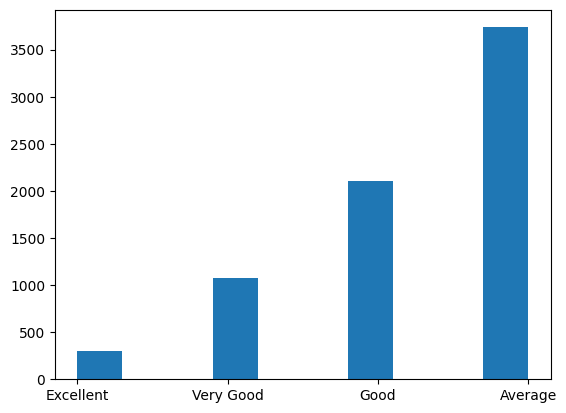

In [28]:
plt.hist(positive_data['Rating text'], label=positive_keywords)
plt.show()

In [29]:
negative_data = df.loc[(df['Aggregate rating']<2.5)&(df['Aggregate rating']>0)]
print(negative_data)
negative_keywords = negative_data['Rating text'].unique()
print(negative_keywords)

      Restaurant ID                  Restaurant Name  Country Code  \
312        17374978                     Troll Tavern           216   
344        17482142              Triangle Restaurant           216   
348        16613059                       Poets Cafe            14   
613         5600961                        Pizza Hut           214   
890          311051                              KFC             1   
...             ...                              ...           ...   
9104           2979                          Chopaal             1   
9105           3237                    Club Ice Cube             1   
9106           2025  Moti Mahal Delux Tandoori Trail             1   
9306        7001208     De Fontein Belgian Beer Cafe           148   
9498        5800634          Elite Indian Restaurant           191   

             City                                            Address  \
312   Gainesville              8590 N Main St Ste B, Helen, GA 30545   
344     Mc Mill

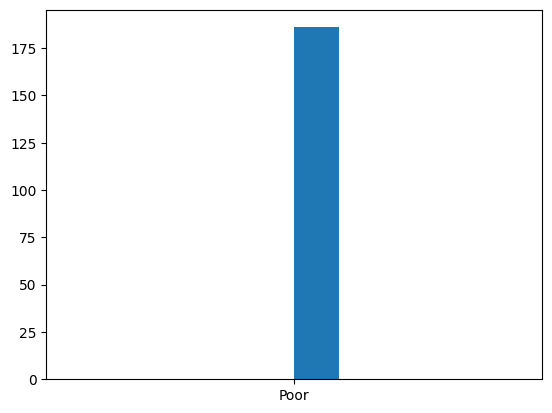

In [30]:
plt.hist(negative_data['Rating text'], label = negative_keywords)
plt.show()

# TASK2: Votes Analysis

In [31]:
# Identify the restaurants with the highest and lowest number of votes

In [32]:
Highest_voted_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending= False)
Highest_voted_restaurant = Highest_voted_restaurant.idxmax()
print('The Highest Voted Restaurant is : ',Highest_voted_restaurant)

The Highest Voted Restaurant is :  Barbeque Nation


In [33]:
lowest_voted_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values()
lowest_voted_restaurant = lowest_voted_restaurant.idxmin()
print('The Lowest Voted Restaurant is : ',lowest_voted_restaurant)

The Lowest Voted Restaurant is :  Laxmi Food Corner


In [34]:
# Analyze if there is a correlation between the number of votes and the rating of restaurant

In [35]:
corelation= np.corrcoef(df['Votes'],df['Aggregate rating'])
corelation= np.round(corelation,2)
print(corelation)

[[1.   0.31]
 [0.31 1.  ]]


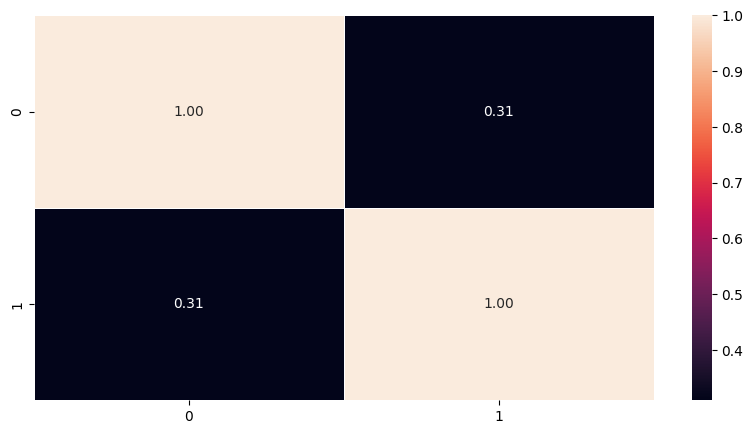

In [37]:
 plt.figure(figsize= (10,5), dpi = 100)
sns.heatmap(corelation,annot=True,fmt='.2f', linewidth= .4)
plt.show()

# TASK3 Price Range vs Online Delivery 

In [42]:
x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

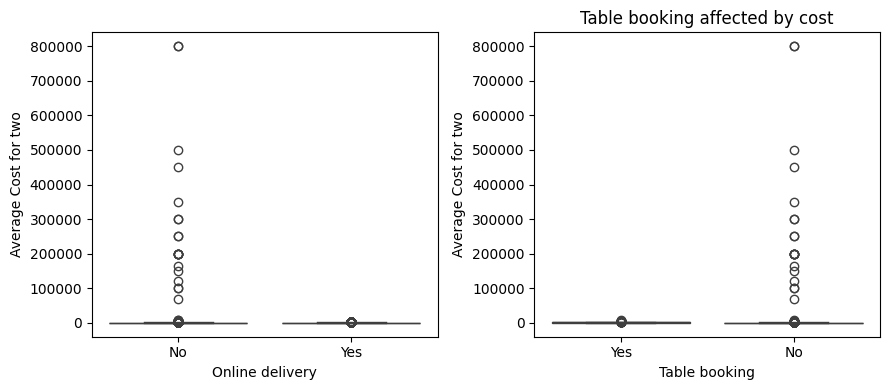

In [47]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()


In [45]:
print('Both the online delivery and Table booking are negatively impacted by the cost')

Both the online delivery and Table booking are negatively impacted by the cost


In [46]:
# Determine if the higher priced restaurants are more likely to offer these service

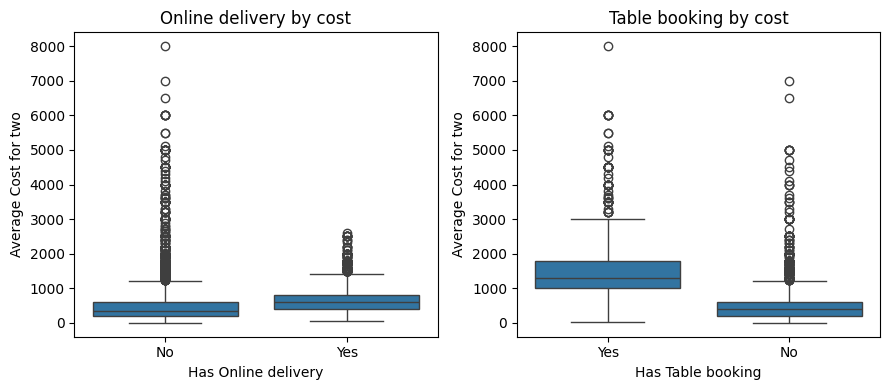

In [49]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Online delivery by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()
